# **Let's revisit Machine Learning!**
### Greates recap of all time!
Let's implement and explain most popular ML algorithms from scratch!
I hope it's gonna be ez<br> after learning Transformer architecture and GPT<br>
<img src="https://i.ibb.co/TqW6x7f/MEME.jpg" width=40%>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### **Let's start with a Linear Regression!**
#### **Explanation**
Linear regression - simplest regression method I guess..<br>
It fits the data by learning slope and y-intercept of simple linear function.<br>
As in any other algorithm we use Gradient Descent for parameter tuning.<br>
In the following code:<br>
- lr - learning rate (controls speed of convergance)<br>
- cost - error score of model (the lower the better)<br>
- dw, db - partial derivatives of cost function w.r.t parameters (weights and bias respecitvely)<br>

---
specs:<br>
loss - mse<br>
optimizer - gradient descent<br>

In [2]:
class LinearRegression:
  def __init__(self):
    self.weights = None
    self.bias = 0

  def fit(self, X, y, n=100, lr=0.1, verbose=10):
    y = y.reshape(-1, 1)
    # weights initialization to zeros (runs once)
    self.m_samples, n_feats = X.shape
    self.weights = np.zeros((n_feats, 1))
    # training
    for iter in range(n):
      # prediction + feedback
      prediction = self.pred(X)
      cost = self.cost_fn(y, prediction)
      if iter % verbose == 0:
        print(f"Iteration: {iter} | Loss: {cost}")
      # update
      dw = 1 / self.m_samples * np.dot(X.T, (prediction - y))
      db = 1 / self.m_samples * np.sum((prediction - y))
      self.weights -= lr * dw
      self.bias -= lr * db

    return self.weights, self.bias

  def pred(self, X):
    return (np.dot(X, self.weights) + self.bias).reshape(-1, 1)

  def cost_fn(self, y, y_pred):
    # mean squared error used
    return 1 / self.m_samples * np.sum((y - y_pred) ** 2)

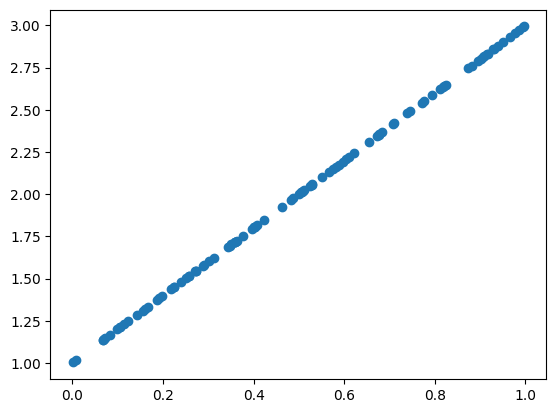

In [3]:
# generate dataset
xs = np.random.random((100, 1))
ys = xs * 2 + 1  # our w=2 and b=1


plt.scatter(xs, ys);

In [4]:
model = LinearRegression()
w, b = model.fit(xs, ys, n=500, verbose=50)
print(w, b)

Iteration: 0 | Loss: 4.304466510654335
Iteration: 50 | Loss: 0.05699028361411888
Iteration: 100 | Loss: 0.029638045806577362
Iteration: 150 | Loss: 0.015414928631922863
Iteration: 200 | Loss: 0.008017398526861568
Iteration: 250 | Loss: 0.004169897939417429
Iteration: 300 | Loss: 0.002168789385596891
Iteration: 350 | Loss: 0.0011280006051502865
Iteration: 400 | Loss: 0.0005866800039088363
Iteration: 450 | Loss: 0.0003051358531324652
[[1.95642097]] 1.0231623488049548


In [5]:
xp = np.linspace(0, 1, 100).reshape(-1, 1)
yp = model.pred(xp)

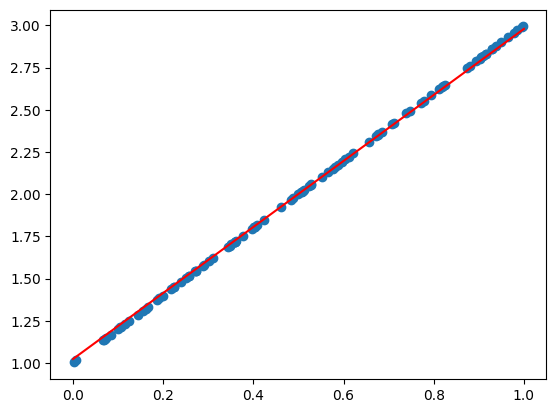

In [6]:
plt.scatter(xs, ys)
plt.plot(xp, yp, c="red");

## **I guess we're good here!**<br>
<p align="center"><img src="https://i.pinimg.com/originals/70/ea/e4/70eae4f80934ec4949fe3dc64426f0d8.jpg" width=30%></p>

### **Now Let's classify things with Logistic Regression!**


### **Logistic Regression:**
Logistic regression is used for Binary classification tasks (or for multiclass classification with more than 1 model).<br>
It's output equation is written as:<br>

$$z = Wx + b$$
$$a = {1 \over 1 + e^{-z}}$$

z is an ordinary Linear Regression, while a is just a sigmoid function applied to the linear model<br>
We can rewrite it as:<br>
$$a = sigmoid(z)$$

---

For this model we use **log_loss**, not mse, because task is defined differently.<br>
Log loss is quite simple and intuitive:<br>
$$L(y, \hat y) = - y log(\hat y) + (1-y)log(1-\hat y)$$
<br>
<img src="https://learningds.org/_images/class_loss_9_0.svg" width=60%><br>
if y (y_true) is 1 we work only with $y log(\hat y)$, because 1-y, being a multiplier for $log(1 - \hat y)$ is 0 in this case.
Left par of the equation (depicted with blue line) is a negative value (but with -1 multiplier, it's positive value) when $\hat y$ is close to 0, meaning our loss value is high (that's right, as $\hat y\approx0$, while $y=1$) and small negative value when $\hat y \approx 1$<br>
pretty much the same works for right part (when $y=0$)

In [7]:
class LogisticRegression:
  def __init__(self):
    self.weights = None
    self.bias = 0

  def fit(self, X, y, n=100, lr=0.1, verbose=10):
    y = y.reshape(-1, 1)
    self.m_samples, n_features = X.shape
    self.weights = np.zeros((n_features, 1))

    for iter in range(n):
      prediction = self.pred(X)
      cost = self.cost_fn(y, prediction)
      if iter % verbose == 0:
        print(cost)
      # update
      dw = 1 / self.m_samples * np.dot(X.T, (prediction - y))
      db = 1 / self.m_samples * np.sum(prediction - y)
      self.weights -= lr * dw
      self.bias -= lr * db
    return self.weights, self.bias

  def pred(self, X):
    return self.sigmoid(np.dot(X, self.weights) + self.bias)

  def cost_fn(self, y, y_pred):
    a = y * np.log(y_pred + 1e-7)
    b = (1 - y) * np.log(1 - y_pred + 1e-7)

    return np.mean(a - b, axis=0)

  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

In [8]:
xs = np.linspace(0, 1, 100).reshape(-1, 1)
ys = xs > 0.5
print(xs.shape, ys.shape)

(100, 1) (100, 1)


In [9]:
model = LogisticRegression()
w, b = model.fit(xs, ys, n=500, verbose=50)

[5.55111512e-17]
[0.070754]
[0.07540697]
[0.06941103]
[0.0626319]
[0.05666856]
[0.0516227]
[0.0473567]
[0.04372328]
[0.04060118]


In [10]:
preds = np.round(model.pred(xs))

0.54


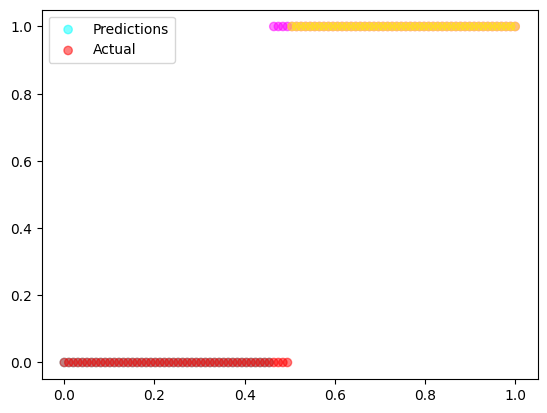

In [11]:
print(np.mean(preds))  # model predicted a bit more positives, but it's ok
plt.scatter(xs, preds, c=preds, cmap='cool', alpha=0.5, label="Predictions")
plt.scatter(xs, ys, c=ys, cmap='autumn', alpha=0.5, label="Actual")
plt.legend()
plt.show()

## **Decision Trees:**<br>
This algorithm can be used for both classification and regression tasks(of course with some minor diferences).<br>
It makes predictions by learning best **split features** and threshold for these featrues.<br> It recursively builds a tree of "questions" that split our data.<br>
Prediction is performed by traversing tree **Depth first** and returning leaf node value.<br>
Leaf node value equals to most frequent category (classification) or mean of target values on the node (regression).<br>
<img src="https://miro.medium.com/v2/resize:fit:1042/0*TBAmo7IbkCOaXuxV.png" width=60%>

---

### **How do we learn splits?**
We try all features and measure their **information gain** with a particular threshold.<br>
For categorical feature we try all its unique values as a threshold, for continuous feature we trt **midpoints** of sorted set of its values.<br>
[0, 1, 4, 6, 7] - sorted feature values<br>
[0.5, 2.5, 5, 6.5] - midpoints<br>

We pick feature with highest information gain

---

### **Information gain?**
We want to pick feature that splits data with **maximum purity** (for classification task), meaning it splits target feature really well.<br>
We can calculate purity with **entropy function** depicted below:<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/2/22/Binary_entropy_plot.svg" width=40%><br>
As you can see this function takes ratio of 1 of the target categories.<br>
We want to **minimize this entropy function**, as it returns minimum value for ratio of either 0 or 1.<br>
We calculate weighted sum of entropy values on both sides.<br>
We weight it by ratio of elements on each side (so they add up to 1.0)<br>
Finally, we subtract this weighted sum from entropy of root node.<br>
This is information gain.<br>
### Entropy:<br>
$$E = -\sum_{i=0}{P_i(x)log_2(P_i(x))}$$
### Information Gain:<br>
$$E_{root} - ((n_l / n)E_{left} + (n_r / n)E_{right})$$

---
## **General Sherman - the biggest tree in the world**
<img src="https://onetreeplanted.org/cdn/shop/files/pf-f38c8ac1--General-Sherman-tree.jpg?v=1685623908" width=30%><br>
But we don't want our tree to grow this tall, because tall tree = overfitted tree<br>
We stop growing depth of our tree with the following base cases:<br>
1) MaxDepth - hyperparameter that limits depth of our tree<br>
2) MinSamplesSplit - hyperparameter that sets minimum number of samples in the node to continue split<br>
3) Only 1 target class in the node (100% purity)

In [12]:
class Node:
  def __init__(self, feature=None, threshold=None, left=None, right=None, val=None):
    self.feature = feature
    self.threshold = threshold
    self.left = left
    self.right = right
    self.val = val

  def is_leaf(self):
    return not self.val is None

In [13]:
class DecisionTreeClassifier:
  def __init__(self, max_depth=50, min_samples_split=2, n_features=None):
    self.loss_history = []
    self.max_depth = max_depth
    self.min_samples_split = min_samples_split
    self.n_features = n_features
    self.root = None

  def fit(self, X, y):
    self.n_features = X.shape[1] if not self.n_features else min(X.shape[1], self.n_features)
    self.root = self.grow(X, y)

  def grow(self, X, y, cur_depth=0):
    n_samples, n_features = X.shape
    n_labels = len(np.unique(y))

    # base case
    if (cur_depth >= self.max_depth) or (n_samples < self.min_samples_split) or (n_labels == 1):
      return Node(val=self.most_common_category(y))

    feature_indices = np.random.choice(n_features, self.n_features,
                                        replace=True)  # n_features may not be equal to self.n_features
    split_feature, split_threshold = self.best_split(X, y, feature_indices)

    # left and right:

    left_indices, right_indices = self.split(X[:, split_feature], split_threshold)
    left = self.grow(X[left_indices, :], y[left_indices], cur_depth + 1)
    right = self.grow(X[right_indices, :], y[right_indices], cur_depth + 1)

    return Node(split_feature, split_threshold, left, right)

  def best_split(self, X, y, feature_indices):
    information_gain = -1
    split_feature_index, best_threshold = None, None

    for feature_index in feature_indices:
      X_col = X[:, feature_index]
      thresholds = np.unique(X_col)

      for threshold in thresholds:
        ig = self.information_gain(X_col, y, threshold)

        if ig > information_gain:
          information_gain = ig
          split_feature_index = feature_index
          best_threshold = threshold
    return split_feature_index, best_threshold

  def information_gain(self, X_col, y, threshold):
    parent_e = self.entropy(y)

    # create_children
    left_indices, right_indices = self.split(X_col, threshold)

    # weighted entropy for children
    n = len(y)
    n_l, n_r = len(left_indices), len(right_indices)
    e_l, e_r = self.entropy(y[left_indices]), self.entropy(y[right_indices])
    child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

    return parent_e - child_entropy

  def entropy(self, y_values):
    p_s = np.bincount(y_values) / len(y_values)
    return -np.sum([p * np.log(p) for p in p_s if p > 0])

  def split(self, X_col, threshold):
    left_indices = np.argwhere(X_col <= threshold).flatten()
    right_indices = np.argwhere(X_col > threshold).flatten()

    return left_indices, right_indices

  def most_common_category(self, y):
    counts = np.bincount(y)
    return np.argmax(counts)

  def traverse_tree(self, x, node):
    # leaf node:
    if node.is_leaf():
        return node.val

    if x[node.feature] <= node.threshold:
        return self.traverse_tree(x, node.left)
    return self.traverse_tree(x, node.right)

  def predict(self, X):
    return [self.traverse_tree(x, self.root) for x in X]


In [14]:
ys = ys.flatten().astype("int")
tree = DecisionTreeClassifier()
tree.fit(xs, ys)

In [15]:
preds = tree.predict(xs)

0.5


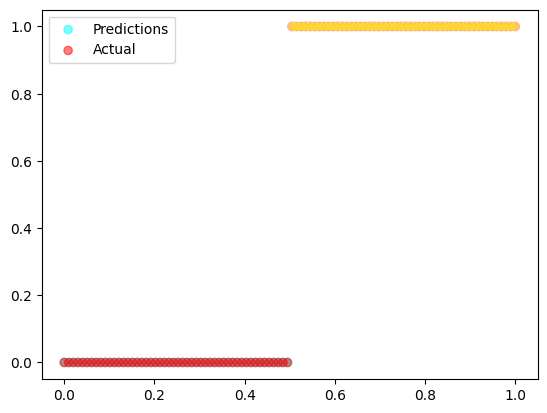

In [16]:
print(np.mean(preds))  # model predicted a bit more positives, but it's ok
plt.scatter(xs, preds, c=preds, cmap='cool', alpha=0.5, label="Predictions")
plt.scatter(xs, ys, c=ys, cmap='autumn', alpha=0.5, label="Actual")
plt.legend()
plt.show()

<img src="https://resizing.flixster.com/cWiU0D9GnfmWAE4GY3EcklntMTo=/375x210/v2/https://statcdn.fandango.com/MPX/image/NBCU_Fandango/79/250/thumb_AC3E8332-BDAE-4BCC-88E6-7885FF452732.jpg" width=40%><br>
**P E R F E C T**

## **Random Forest**
What is better than one Decision Tree?<br>
**Ensemble of decision trees!**
Yep, it's just multiple decison trees that are trained on **random parts** of the data. On prediction we pass the data through all trees and pick the most frequent category prediction (for classification) or mean of predictions (for regression).<br>
In random forests we grow smaller trees fixing overfitting and improving quality.<br>
ENSEMBLES - models that include combining/stacking multiple simpler models!<br>
<img src="https://miro.medium.com/v2/resize:fit:592/1*i0o8mjFfCn-uD79-F1Cqkw.png" width=60%><br>

### **But how do we build different decision trees?**
Shouldn't algorithm build identical trees?<br>
To build different trees we use randomly picked k features (not all).
Usually we pick $k = \sqrt{n}$
It is performed with **SAMPLING WITH REPLACEMENT**<br>
<img src="https://miro.medium.com/v2/resize:fit:720/0*aElaUl23J2Nwd7Fg.png" width=50%>

In [17]:
class RandomForestClassifier:
  def __init__(self, n_trees=50, max_depth=10, min_samples_split=2, k_features=None):
    self.n_trees = n_trees
    self.max_depth = max_depth
    self.min_samples_split = min_samples_split
    self.k_features = k_features
    self.trees = []

  def fit(self, X, y):
    if not self.k_features:
      self.k_features = np.sqrt(X.shape[1])
    for tree in range(self.n_trees):
      tree = DecisionTreeClassifier(self.max_depth, self.min_samples_split, self.k_features)
      tree.fit(X, y)
      self.trees.append(tree)

  def predict(self, X):
    prediction = []
    results = np.array([tree.predict(X) for tree in self.trees])
    for i in range(X.shape[0]):
      prediction.append(self.most_frequent(results[:, i]))
    return np.array(prediction)

  def most_frequent(self, results):
    category_counts = np.bincount(results)
    return np.argmax(category_counts)

In [18]:
forest = RandomForestClassifier()
forest.fit(xs, ys)

In [19]:
preds = forest.predict(xs)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

0.5


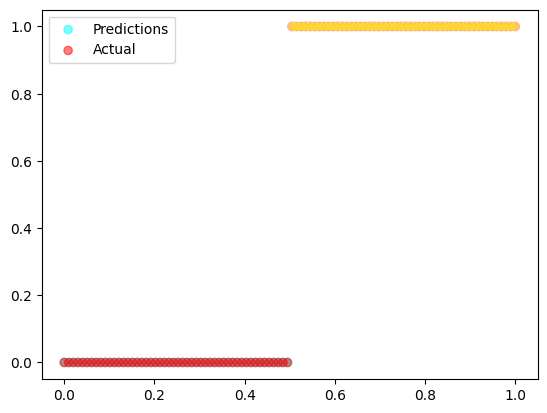

In [20]:
print(np.mean(preds))  # model predicted a bit more positives, but it's ok
plt.scatter(xs, preds, c=preds, cmap='cool', alpha=0.5, label="Predictions")
plt.scatter(xs, ys, c=ys, cmap='autumn', alpha=0.5, label="Actual")
plt.legend()
plt.show()

<img src="https://upload.wikimedia.org/wikipedia/en/6/61/Vault_Boy_artwork.png" width=10%> **REMEMBER: BOTH DECISION TREES AND RANDOM FORESTS ARE ALSO USED FOR REGRESSION TASKS**

## **Gradient Boosting**
XGBoost is considered to be the most powerful ML algorithm for tabular data<br>
Gradient boosting is a ML ensemble algorithm that fits many trees to learn different parts of our data<br>
Shortest description for GBoost is that it builds a tree, finds where it performs worse and fits separate tree learning *bad parts* (pseudo residuals).<br>
On inference GBoost passes data through these trees and adds them up (trees are weighted by learning rate)<br>
<img src="https://arogozhnikov.github.io/images/gbdt_attractive_picture.png" width=80%><br>
In this part I'll describe both Classification and Regression (there are some differences)<br>

---

### Gradient Boosting for Regression
1. Start with 1 leaf (mean of target variable)
2. Calculate **Pseudo residuals** (observed - predicted)
3. Fit separate tree to predict **pseduo residuals**
4. Scale tree result by lr (0.1 etc.) and add it to mean leaf
5. Repeat from step 2

**Why Pseudo residuals?** <br>
We use **residuals** term in Linear Regression $(observed - predicted)^2$
<br>
### Going crazy a bit...
Weird idea, but if you are familiar with **ResNETs** you can find significan similarities<br>
Recently I found interestig paper about this topic<br>
[Residual Networks Behave Like Boosting Algorithms](https://arxiv.org/pdf/1909.11790) (on Arxiv)<br>
Let's implement it!

In [34]:
# For regressor we need DecisionTreeRegressor:
class DecisionTreeRegressor:
    def __init__(self, max_depth=50, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        self.root = self.grow(X, y)

    def grow(self, X, y, depth=0):
        n_samples, n_features = X.shape
        if depth == self.max_depth or n_samples < self.min_samples_split or np.all(y == y[0]):
            return Node(val=np.mean(y))

        # Find the best split
        split_feature, split_threshold = self._find_best_split(X, y)

        if split_feature is None:
            return Node(val=np.mean(y))

        left_indices = X[:, split_feature] < split_threshold
        right_indices = ~left_indices

        left_subtree = self.grow(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self.grow(X[right_indices], y[right_indices], depth + 1)

        return Node(split_feature, split_threshold, left_subtree, right_subtree)

    def _find_best_split(self, X, y):
        best_mse = float('inf')
        best_feature = None
        best_threshold = None

        n_samples, n_features = X.shape

        for feature_idx in range(n_features):
            thresholds = np.unique(X[:, feature_idx])

            for threshold in thresholds:
                left_indices = X[:, feature_idx] < threshold
                right_indices = ~left_indices

                if np.sum(left_indices) < 2 or np.sum(right_indices) < 2:
                    continue

                mse = self._calculate_mse(y[left_indices], y[right_indices])
                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature_idx
                    best_threshold = threshold

        return best_feature, best_threshold

    def _calculate_mse(self, left_targets, right_targets):
        left_variance = np.var(left_targets)
        right_variance = np.var(right_targets)
        return (len(left_targets) * left_variance + len(right_targets) * right_variance) / (len(left_targets) + len(right_targets))

    def predict(self, X):
        return np.array([self.traverse(x, self.root) for x in X])

    def traverse(self, x, node):
        if node.is_leaf():
            return node.val
        else:
            if x[node.feature] < node.threshold:
                return self.traverse(x, node.left)
            else:
                return self.traverse(x, node.right)

GBoost Regressor:

In [35]:
# Gradient Boosting Regressor:

class GBoostRegressor:
  def __init__(self, n_estimators=20, max_depth=5, min_samples_split=2):
    self.n_estimators = n_estimators
    self.max_depth = max_depth
    self.min_samples_split = min_samples_split
    self.trees = []

  def fit(self, X, y, lr=0.1):
    self.lr = lr
    self.mean_leaf = np.mean(y)
    self.preds = np.ones(len(y)) * np.mean(y)

    for t in range(self.n_estimators):
      pseudo_residuals = self.preds - y
      tree = DecisionTreeRegressor(self.max_depth, self.min_samples_split)
      tree.fit(X, pseudo_residuals)
      self.trees.append(tree)
      self.preds += self.lr * tree.predict(X)

  def predict(self, X):
    return np.sum(self.lr * tree.predict(X) for tree in self.trees) + self.mean_leaf

For classification our algorithm has some minor differences<br>
1. We use log of the odds instead of mean
$$odds = {n_{pos} \over n_{neg}}$$
2. We calculate residuals the same way
3. We DO NOT add leaf mean to previous predictions.
Instead we add $$\sum residuals \over \sum preds (1 - preds)$$
This is done for optimization, because simple leaf mean doesn't take into account how confident our model is.<br>
It will make smaller update if our model is confident and larger when it is not confident (preds = 0.5)